# Running processes in DataWrangling10 with using full demographic populations added to demographic dataset

# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [67]:
avg_NE_aqi_2017_2019 = pd.read_csv('../../data/processed/clean_avg_NE_aqi_2017_2019')

NE_dem_ratio_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_dem_ratio_2017_2019.csv')

NE_unemploy_rate_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_unemploy_rate_2017_2019.csv')

NE_pov_ratio_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_pov_rate_2017_2019.csv')

NE_educ_vehicle_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_edu_vehicle_2017_2019.csv')

NE_incomes_2017_2019 = pd.read_csv('../../data/processed/NE_incomes_2017_2019')

* have all data for 2017 all compiled together merged columns
* then repeat for 2018 and 2019 data

In [68]:
display(avg_NE_aqi_2017_2019)
display(NE_unemploy_rate_2017_2019)
display(NE_pov_ratio_2017_2019)
display(NE_educ_vehicle_2017_2019)
display(NE_dem_ratio_2017_2019)
display(NE_incomes_2017_2019)

,GeoFIPS,State Name,county Name,AQI_2017,AQI_2018,AQI_2019
0,9001,Connecticut,Fairfield,46.315068,47.904110,46.495890
1,9003,Connecticut,Hartford,43.202740,40.594521,41.490411
2,9005,Connecticut,Litchfield,38.250689,38.449036,38.564384
3,9007,Connecticut,Middlesex,44.028986,43.875000,44.487805
4,9009,Connecticut,New Haven,44.789041,45.509589,46.090411
...,...,...,...,...,...,...
146,44009,Rhode Island,Washington,33.433702,33.290859,32.991477
147,50003,Vermont,Bennington,36.271978,36.186301,35.994521
148,50007,Vermont,Chittenden,35.632877,38.520548,37.457534
149,50021,Vermont,Rutland,38.172603,38.780822,38.273973


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,9001,CT,"Fairfield County, CT",479458,457625,21833,4.6,479179,460045,19134,4.0,481023,463547,17476,3.6
1,9003,CT,"Hartford County, CT",477390,454205,23185,4.9,478660,458138,20522,4.3,483303,464533,18770,3.9
2,9005,CT,"Litchfield County, CT",104051,99522,4529,4.4,104604,100568,4036,3.9,105182,101543,3639,3.5
3,9007,CT,"Middlesex County, CT",92583,88817,3766,4.1,92811,89517,3294,3.5,93696,90703,2993,3.2
4,9009,CT,"New Haven County, CT",457800,434645,23155,5.1,458799,438485,20314,4.4,461613,443514,18099,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,50019,VT,"Orleans County, VT",13601,12920,681,5.0,13501,12924,577,4.3,13275,12713,562,4.2
240,50021,VT,"Rutland County, VT",31096,30030,1066,3.4,30752,29828,924,3.0,30446,29608,838,2.8
241,50023,VT,"Washington County, VT",34260,33273,987,2.9,34512,33658,854,2.5,34360,33586,774,2.3
242,50025,VT,"Windham County, VT",22823,22132,691,3.0,22470,21856,614,2.7,21977,21416,561,2.6


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,90% CI UB All Ages_2018,"Poverty Percent, All Ages_2018",90% CI LB percent_2018,90% CI UB percent_2018,"Poverty Estimate, Age 0-17_2018",90% CI LB percent 0-17_2018,90% CI UB 0-17_2018,"Poverty Percent, Age 0-17_2018",90% CI LB percent 0-17 percent_2018,90% CI UB 0-17 percent_2018,"Poverty Estimate, Age 5-17 in Families_2018",90% CI LB 5-17 fam_2018,90% CI UB 5-17 fam_2018,"Poverty Percent, Age 5-17 in Families_2018",90% CI LB 5-17 percent_2018,90% CI UB percent 5-17 percent_2018,Median Household Income_2018,90% CI Lower Bound LB medh inc_2018,90% CI UB medh inc_2018,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,90% CI UB All Ages_2019,"Poverty Percent, All Ages_2019",90% CI LB percent_2019,90% CI UB percent_2019,"Poverty Estimate, Age 0-17_2019",90% CI LB percent 0-17_2019,90% CI UB 0-17_2019,"Poverty Percent, Age 0-17_2019",90% CI LB percent 0-17 percent_2019,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,9001,CT,Fairfield County,82428.0,74608.0,90248.0,8.8,8.0,9.6,24161.0,20926.0,27396.0,11.3,9.8,12.8,16941.0,14642.0,19240.0,10.5,9.1,11.9,91170.0,88902.0,93438.0,92971.0,86234.0,99708.0,10.0,9.3,10.7,26730.0,24002.0,29458.0,12.7,11.4,14.0,19429.0,17417.0,21441.0,12.2,10.9,13.5,91183.0,88535.0,93831.0,83047.0,75296.0,90798.0,9.0,8.2,9.8,24441.0,21249.0,27633.0,11.8,10.3,13.3,18562.0,16078.0,21046.0,11.9,10.3,13.5,96966.0,93161.0,100771.0
1,9003,CT,Hartford County,96200.0,88256.0,104144.0,11.0,10.1,11.9,28488.0,24981.0,31995.0,15.3,13.4,17.2,20592.0,17992.0,23192.0,14.8,12.9,16.7,70433.0,68420.0,72446.0,96957.0,89308.0,104606.0,11.2,10.3,12.1,28641.0,25220.0,32062.0,15.5,13.7,17.3,20405.0,17874.0,22936.0,14.8,13.0,16.6,73037.0,70717.0,75357.0,93694.0,86070.0,101318.0,10.8,9.9,11.7,25717.0,22040.0,29394.0,14.0,12.0,16.0,17852.0,15166.0,20538.0,13.1,11.1,15.1,75336.0,73281.0,77391.0
2,9005,CT,Litchfield County,12481.0,10381.0,14581.0,6.9,5.7,8.1,2642.0,1990.0,3294.0,7.9,5.9,9.9,1935.0,1456.0,2414.0,7.5,5.6,9.4,77968.0,74165.0,81771.0,12441.0,10517.0,14365.0,6.9,5.8,8.0,2643.0,1974.0,3312.0,8.1,6.0,10.2,1722.0,1225.0,2219.0,6.9,4.9,8.9,76304.0,72739.0,79869.0,12741.0,10601.0,14881.0,7.1,5.9,8.3,2998.0,2312.0,3684.0,9.4,7.2,11.6,2077.0,1591.0,2563.0,8.5,6.5,10.5,81015.0,77226.0,84804.0
3,9007,CT,Middlesex County,10796.0,8906.0,12686.0,6.8,5.6,8.0,2169.0,1662.0,2676.0,7.4,5.7,9.1,1483.0,1103.0,1863.0,6.7,5.0,8.4,81533.0,76017.0,87049.0,10556.0,8754.0,12358.0,6.7,5.6,7.8,2314.0,1847.0,2781.0,8.1,6.5,9.7,1580.0,1231.0,1929.0,7.3,5.7,8.9,88709.0,84493.0,92925.0,11024.0,9322.0,12726.0,7.0,5.9,8.1,1996.0,1466.0,2526.0,7.2,5.3,9.1,1388.0,981.0,1795.0,6.6,4.7,8.5,81721.0,74613.0,88829.0
4,9009,CT,New Haven County,91639.0,82523.0,100755.0,11.0,9.9,12.1,26499.0,22681.0,30317.0,15.3,13.1,17.5,18873.0,16055.0,21691.0,14.7,12.5,16.9,66764.0,64782.0,68746.0,96563.0,88623.0,104503.0,11.6,10.6,12.6,28530.0,25003.0,32057.0,16.7,14.6,18.8,19709.0,17133.0,22285.0,15.5,13.5,17.5,67720.0,65318.0,70122.0,99423.0,91433.0,107413.0,12.0,11.0,13.0,31191.0,27785.0,34597.0,1

,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,GRAD_TOT_2017,VEHICLE_TOT_2017,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,POP_2018,EDU_TOT_2018,LESS_HS_TOT_2018,HS_TOT_2018,COL_OR_ASSOC_TOT_2018,BACH_TOT_2018,GRAD_TOT_2018,VEHICLE_TOT_2018,EDU_TOT_ratio_2018,LESS_HS_TOT_ratio_2018,HS_TOT_ratio_2018,COL_OR_ASSOC_TOT_ratio_2018,BACH_TOT_ratio_2018,GRAD_TOT_ratio_2018,VEHICLE_TOT_ratio_2018,POP_2019,EDU_TOT_2019,LESS_HS_TOT_2019,HS_TOT_2019,COL_OR_ASSOC_TOT_2019,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,9163.0,35920,66.185928,8.359560,23.588116,18.327358,7.552247,8.358647,32.766846,108047,71491.0,6999.0,27872.0,20166.0,7954.0,8500.0,38315,66.166576,6.477737,25.796181,18.664100,7.361611,7.866947,35.461420,107740,72234.0,9227.0,25602.0,20988.0,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,31278.0,105705,71.525086,4.635684,16.980541,19.820419,16.481561,13.606880,45.984887,230163,163277.0,9405.0,38362.0,46304.0,38419.0,30787.0,106050,70.939725,4.086235,16.667318,20.117916,16.692083,13.376173,46.076042,229863,165720.0,10327.0,40812.0,44070.0,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,12751.0,60290,69.072735,6.482821,20.662745,22.667695,11.062900,8.196574,38.755504,155350,105753.0,9831.0,29033.0,32044.0,18312.0,16533.0,60160,68.074026,6.328291,18.688767,20.626971,11.787576,10.642420,38.725459,155299,108994.0,7839.0,31368.0,31594.0,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,7445.0,35585,70.638028,6.761459,26.921199,21.483990,7.738806,7.732574,36.959525,95796,68131.0,6487.0,25462.0,19585.0,7953.0,8644.0,37110,71.120924,6.771681,26.579398,20.444486,8.302017,9.023341,38.738569,95379,67762.0,5812.0,24600.0,20809.0,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,169968.0,617715,69.456038,6.873693,18.559191,18.702062,13.936407,11.384685,41.375382,1481093,1034154.0,94347.0,283724.0,274467.0,206555.0,175061.0,613225,69.823705,6.370093,19.156393,18.531382,13.946120,11.819717,41.403545,1476601,1035815.0,94467.0,271535.0,273432.0,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,12736.0,42395,71.933993,5.124694,20.737392,18.218338,15.030758,12.822810,42.683970,98892,70844.0,4026.0,18082.0,19678.0,16184.0,12874.0,40250,71.637746,4.071108,18.284593,19.898475,16.365328,13.018242,40.700967,98320,72210.0,5625.0,19030.0,20054.0,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
153,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,187649.0,391980,71.878018,12.930820,20.936054,15.809711,14.245424,7.956009,16.619308,2278906,1646542.0,288371.0,443283.0,364022.0,345988.0,204878.0,389190,72.251422,12.653923,19.451570,15.973542,15.182197,8.990191,17.077931,2253858,1633699.0,277864.0,446542.0,367397.0,334272.0,20

,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,HBA_FEMALE_2017,HIA_MALE_2017,HIA_FEMALE_2017,HAA_MALE_2017,HAA_FEMALE_2017,HNA_MALE_2017,HNA_FEMALE_2017,HTOM_MALE_2017,HTOM_FEMALE_2017,HWAC_MALE_2017,HWAC_FEMALE_2017,HBAC_MALE_2017,HBAC_FEMALE_2017,HIAC_MALE_2017,HIAC_FEMALE_2017,HAAC_MALE_2017,HAAC_FEMALE_2017,HNAC_MALE_2017,HNAC_FEMALE_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,IA_MALE_ratio_2017,IA_FEMALE_ratio_2017,AA_MALE_ratio_2017,AA_FEMALE_ratio_2017,NA_MALE_ratio_2017,NA_FEMALE_ratio_2017,TOM_MALE_ratio_2017,TOM_FEMALE_ratio_2017,WAC_MALE_ratio_2017,WAC_FEMALE_ratio_2017,BAC_MALE_ratio_2017,BAC_FEMALE_ratio_2017,IAC_MALE_ratio_2017,IAC_FEMALE_ratio_2017,AAC_MALE_ratio_2017,AAC_FEMALE_ratio_2017,NAC_MALE_ratio_2017,NAC_FEMALE_ratio_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield County,943038,459242,483796,366178,379174,54885,63641,2544,2231,25280,28261,545,460,9810,10029,374704,387799,60472,69753,4568,4489,28796,31590,1345,1122,365528,391893,286103,300823,47287,55487,590,606,24652,27687,152,158,6744,7132,291982,306898,50592,59290,1757,2001,27723,30702,621,595,93714,91903,80075,78351,7598,8154,1954,1625,628,574,393,302,3

## Try make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [69]:
avg_NE_aqi_2017 = avg_NE_aqi_2017_2019.iloc[:,:4]
NE_unemploy_rate_2017 = NE_unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(NE_pov_ratio_2017_2019.columns[0:1]) + list(NE_pov_ratio_2017_2019.columns[3:24])
NE_pov_ratio_2017 = NE_pov_ratio_2017_2019.loc[:, pov_col_2017]

NE_incomes_2017 = NE_incomes_2017_2019.iloc[:, [0, 2, 5]]

educ_vehicle_2017_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[4:19])
NE_educ_vehicle_2017 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[3:148])
NE_dem_ratio_2017 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [70]:
NE_avg_aqi_unemploy_2017 = pd.merge(avg_NE_aqi_2017, NE_unemploy_rate_2017, how='inner')
NE_avg_aqi_unemploy_pov_2017 = pd.merge(NE_avg_aqi_unemploy_2017, NE_pov_ratio_2017, how='inner')
NE_avg_aqi_unemploy_pov_inc_2017 = pd.merge(NE_avg_aqi_unemploy_pov_2017, NE_incomes_2017, how='inner')
NE_avg_aqi_unemploy_pov_inc_educ_veh_2017 = pd.merge(NE_avg_aqi_unemploy_pov_inc_2017, NE_educ_vehicle_2017, how='inner')
df_2017 = pd.merge(NE_avg_aqi_unemploy_pov_inc_educ_veh_2017, NE_dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,county Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,GRAD_TOT_2017,VEHICLE_TOT_2017,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,HBA_FEMALE_2017,HIA_MALE_2017,HIA_FEMALE_2017,HAA_MALE_2017,HAA_FEMALE_2017,HNA_MALE_2017,HNA_FEMALE_2017,HTOM_MALE_2017,HTOM_FEMALE_2017,HWAC_MALE_2017,HWAC_FEMALE_2017,HBAC_MALE_2017,HBAC_FEMALE_2017,HIAC_MALE_2017,HIAC_FEMALE_2017,HAAC_MALE_2017,HAAC_FEMALE_2017,HNAC_MALE_2017,HNAC_FEMALE_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,IA_MALE_ratio_2017,IA_FEMALE_ratio_2017,AA_MALE_ratio_2017,AA_FEMALE_ratio_2017,NA_MALE_ratio_2017,NA_FEMALE_ratio_2017,TOM_MALE_ratio_2017,TOM_FEMALE_ratio_2017,WAC_MALE_ratio_2017,WAC_FEMALE_ratio_2017,BAC_MALE_ratio_2017,BAC_FEMALE_ratio_2017,IAC_MALE_ratio_2017,IAC_FEMALE_ratio_2017,AAC_MALE_ratio_2017,AAC_FEMALE_ratio_2017,NAC_MALE_ratio_2017,NAC_FEMALE_ratio_2017,NH_MALE_ratio_2017,NH_FEMALE_ratio_2017,NHWA_MALE_ratio_2017,NHWA_FEMALE_ratio_2017,NHBA_MALE_ratio_2017,NHBA_FEMALE_ratio_2017,NHIA_MALE_ratio_2017,NHIA_FEMALE_ratio_2017,NHAA_MALE_ratio_2017,NHAA_FEMALE_ratio_2017,NHNA_MALE_ratio_2017,NHNA_FEMALE_ratio_2017,NHTOM_MALE_ratio_2017,NHTOM_FEMALE_ratio_2017,NHWAC_MALE_ratio_2017,NHWAC_FEMALE_ratio_2017,NHBAC_MALE_ratio_2017,NHBAC_FEMALE_ratio_2017,NHIAC_MALE_ratio_2017,NHIAC_FEMALE_ratio_2017,NHAAC_MALE_ratio_2017,NHAAC_FEMALE_ratio_2017,NHNAC_MALE_ratio_2017,NHNAC_FEMALE_ratio_2017,H_MALE_ratio_2017,H_FEMALE_ratio_2017,HWA_MALE_ratio_2017,HWA_FEMALE_ratio_2017,HBA_MALE_ratio_2017,HBA_FEMALE_ratio_2017,HIA_MALE_ratio_2017,HIA_FEMALE_ratio_2017,HAA_MALE_ratio_2017,HAA_FEMALE_ratio_2017,HNA_MALE_ratio_2017,HNA_FEMALE_ratio_2017,HTOM_MALE_ratio_2017,HTOM_FEMALE_ratio_2017,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,9001,Connecticut,Fairfield,46.315068,479458,457625,21833,4.6,82428.0,74608.0,90248.0,8.8,8.0,9.6,24161.0,20926.0,27396.0,11.3,9.8,12.8,16941.0,14642.0,19240.0,10.5,9.1,11.9,91170.0,88902.0,93438.0,105035540.0,111380.0,949921,6

* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

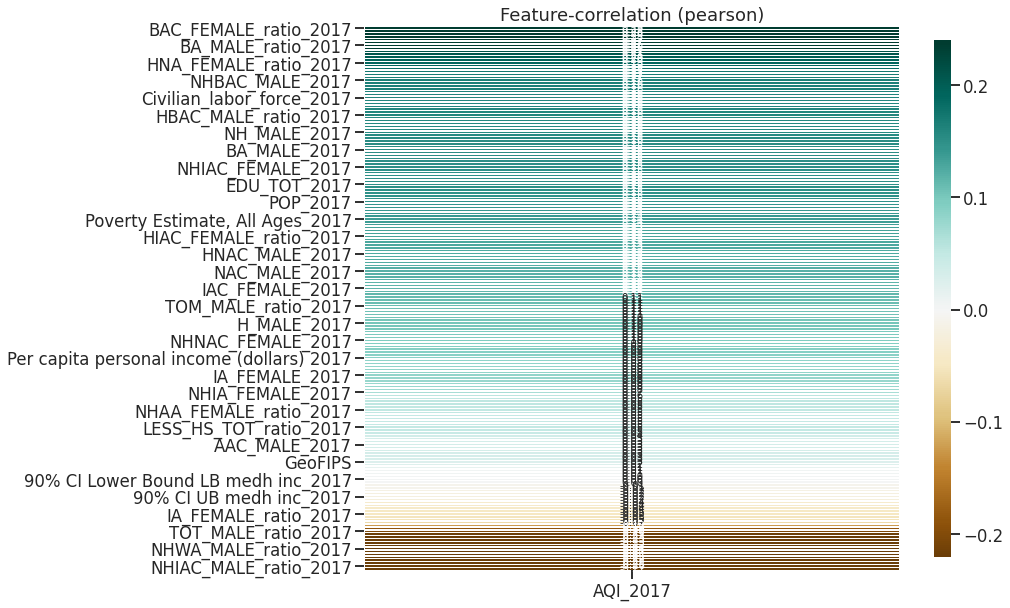

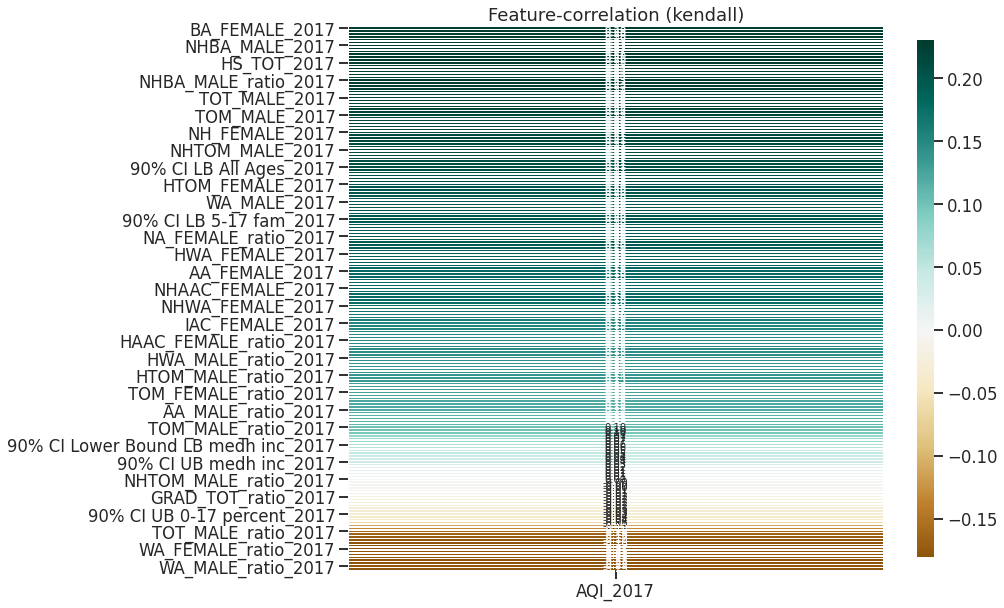

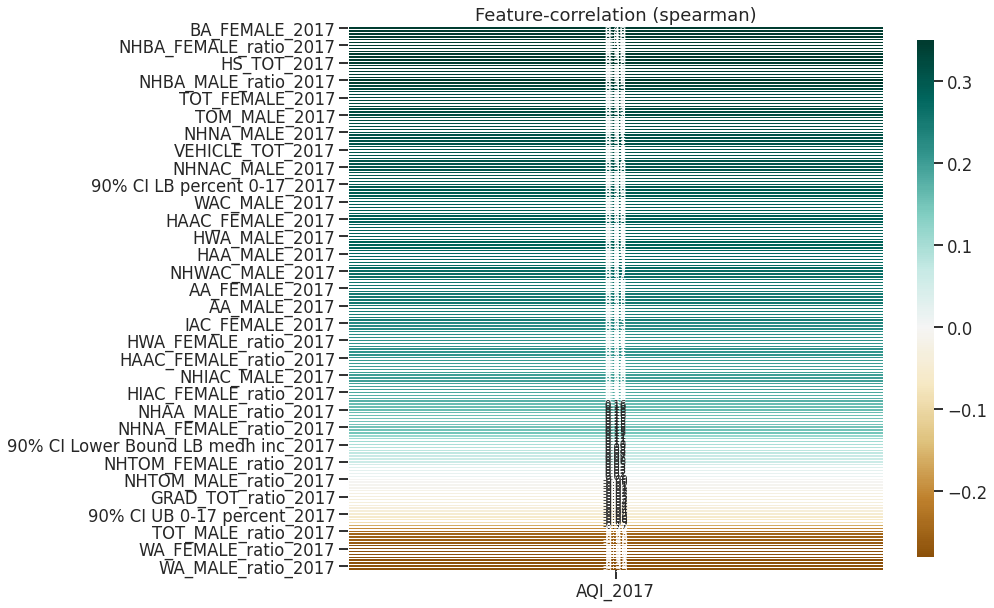

In [71]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Try make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [72]:
avg_NE_aqi_2018 = avg_NE_aqi_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(NE_unemploy_rate_2017_2019.columns[0:1]) + list(NE_unemploy_rate_2017_2019.columns[7:11])
NE_unemploy_rate_2018 = NE_unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(NE_pov_ratio_2017_2019.columns[0:1]) + list(NE_pov_ratio_2017_2019.columns[24:45])
NE_pov_ratio_2018 = NE_pov_ratio_2017_2019.loc[:, pov_col_2018]

NE_incomes_2018 = NE_incomes_2017_2019.iloc[:, [0, 3, 6]]

educ_vehicle_2018_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[19:34])
NE_educ_vehicle_2018 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

dem_ratio_2018_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[148:293])
NE_dem_ratio_2018 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2018_col]

In [73]:
NE_avg_aqi_unemploy_2018 = pd.merge(avg_NE_aqi_2018, NE_unemploy_rate_2018, how='inner')
NE_avg_aqi_unemploy_pov_2018 = pd.merge(NE_avg_aqi_unemploy_2018, NE_pov_ratio_2018, how='inner')
NE_avg_aqi_unemploy_pov_inc_2018 = pd.merge(NE_avg_aqi_unemploy_pov_2018, NE_incomes_2018, how='inner')
NE_avg_aqi_unemploy_pov_inc_educ_veh_2018 = pd.merge(NE_avg_aqi_unemploy_pov_inc_2018, NE_educ_vehicle_2018, how='inner')
df_2018 = pd.merge(NE_avg_aqi_unemploy_pov_inc_educ_veh_2018, NE_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,county Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,90% CI UB All Ages_2018,"Poverty Percent, All Ages_2018",90% CI LB percent_2018,90% CI UB percent_2018,"Poverty Estimate, Age 0-17_2018",90% CI LB percent 0-17_2018,90% CI UB 0-17_2018,"Poverty Percent, Age 0-17_2018",90% CI LB percent 0-17 percent_2018,90% CI UB 0-17 percent_2018,"Poverty Estimate, Age 5-17 in Families_2018",90% CI LB 5-17 fam_2018,90% CI UB 5-17 fam_2018,"Poverty Percent, Age 5-17 in Families_2018",90% CI LB 5-17 percent_2018,90% CI UB percent 5-17 percent_2018,Median Household Income_2018,90% CI Lower Bound LB medh inc_2018,90% CI UB medh inc_2018,Personal income (thousands of dollars) 2018,Per capita personal income (dollars) 2018,POP_2018,EDU_TOT_2018,LESS_HS_TOT_2018,HS_TOT_2018,COL_OR_ASSOC_TOT_2018,BACH_TOT_2018,GRAD_TOT_2018,VEHICLE_TOT_2018,EDU_TOT_ratio_2018,LESS_HS_TOT_ratio_2018,HS_TOT_ratio_2018,COL_OR_ASSOC_TOT_ratio_2018,BACH_TOT_ratio_2018,GRAD_TOT_ratio_2018,VEHICLE_TOT_ratio_2018,TOT_POP_2018,TOT_MALE_2018,TOT_FEMALE_2018,WA_MALE_2018,WA_FEMALE_2018,BA_MALE_2018,BA_FEMALE_2018,IA_MALE_2018,IA_FEMALE_2018,AA_MALE_2018,AA_FEMALE_2018,NA_MALE_2018,NA_FEMALE_2018,TOM_MALE_2018,TOM_FEMALE_2018,WAC_MALE_2018,WAC_FEMALE_2018,BAC_MALE_2018,BAC_FEMALE_2018,IAC_MALE_2018,IAC_FEMALE_2018,AAC_MALE_2018,AAC_FEMALE_2018,NAC_MALE_2018,NAC_FEMALE_2018,NH_MALE_2018,NH_FEMALE_2018,NHWA_MALE_2018,NHWA_FEMALE_2018,NHBA_MALE_2018,NHBA_FEMALE_2018,NHIA_MALE_2018,NHIA_FEMALE_2018,NHAA_MALE_2018,NHAA_FEMALE_2018,NHNA_MALE_2018,NHNA_FEMALE_2018,NHTOM_MALE_2018,NHTOM_FEMALE_2018,NHWAC_MALE_2018,NHWAC_FEMALE_2018,NHBAC_MALE_2018,NHBAC_FEMALE_2018,NHIAC_MALE_2018,NHIAC_FEMALE_2018,NHAAC_MALE_2018,NHAAC_FEMALE_2018,NHNAC_MALE_2018,NHNAC_FEMALE_2018,H_MALE_2018,H_FEMALE_2018,HWA_MALE_2018,HWA_FEMALE_2018,HBA_MALE_2018,HBA_FEMALE_2018,HIA_MALE_2018,HIA_FEMALE_2018,HAA_MALE_2018,HAA_FEMALE_2018,HNA_MALE_2018,HNA_FEMALE_2018,HTOM_MALE_2018,HTOM_FEMALE_2018,HWAC_MALE_2018,HWAC_FEMALE_2018,HBAC_MALE_2018,HBAC_FEMALE_2018,HIAC_MALE_2018,HIAC_FEMALE_2018,HAAC_MALE_2018,HAAC_FEMALE_2018,HNAC_MALE_2018,HNAC_FEMALE_2018,TOT_MALE_ratio_2018,TOT_FEMALE_ratio_2018,WA_MALE_ratio_2018,WA_FEMALE_ratio_2018,BA_MALE_ratio_2018,BA_FEMALE_ratio_2018,IA_MALE_ratio_2018,IA_FEMALE_ratio_2018,AA_MALE_ratio_2018,AA_FEMALE_ratio_2018,NA_MALE_ratio_2018,NA_FEMALE_ratio_2018,TOM_MALE_ratio_2018,TOM_FEMALE_ratio_2018,WAC_MALE_ratio_2018,WAC_FEMALE_ratio_2018,BAC_MALE_ratio_2018,BAC_FEMALE_ratio_2018,IAC_MALE_ratio_2018,IAC_FEMALE_ratio_2018,AAC_MALE_ratio_2018,AAC_FEMALE_ratio_2018,NAC_MALE_ratio_2018,NAC_FEMALE_ratio_2018,NH_MALE_ratio_2018,NH_FEMALE_ratio_2018,NHWA_MALE_ratio_2018,NHWA_FEMALE_ratio_2018,NHBA_MALE_ratio_2018,NHBA_FEMALE_ratio_2018,NHIA_MALE_ratio_2018,NHIA_FEMALE_ratio_2018,NHAA_MALE_ratio_2018,NHAA_FEMALE_ratio_2018,NHNA_MALE_ratio_2018,NHNA_FEMALE_ratio_2018,NHTOM_MALE_ratio_2018,NHTOM_FEMALE_ratio_2018,NHWAC_MALE_ratio_2018,NHWAC_FEMALE_ratio_2018,NHBAC_MALE_ratio_2018,NHBAC_FEMALE_ratio_2018,NHIAC_MALE_ratio_2018,NHIAC_FEMALE_ratio_2018,NHAAC_MALE_ratio_2018,NHAAC_FEMALE_ratio_2018,NHNAC_MALE_ratio_2018,NHNAC_FEMALE_ratio_2018,H_MALE_ratio_2018,H_FEMALE_ratio_2018,HWA_MALE_ratio_2018,HWA_FEMALE_ratio_2018,HBA_MALE_ratio_2018,HBA_FEMALE_ratio_2018,HIA_MALE_ratio_2018,HIA_FEMALE_ratio_2018,HAA_MALE_ratio_2018,HAA_FEMALE_ratio_2018,HNA_MALE_ratio_2018,HNA_FEMALE_ratio_2018,HTOM_MALE_ratio_2018,HTOM_FEMALE_ratio_2018,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,9001,Connecticut,Fairfield,47.904110,479179,460045,19134,4.0,92971.0,86234.0,99708.0,10.0,9.3,10.7,26730.0,24002.0,29458.0,12.7,11.4,14.0,19429.0,17417.0,21441.0,12.2,10.9,13.5,91183.0,88535.0,93831.0,110852690.0,117432.0,9438

* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

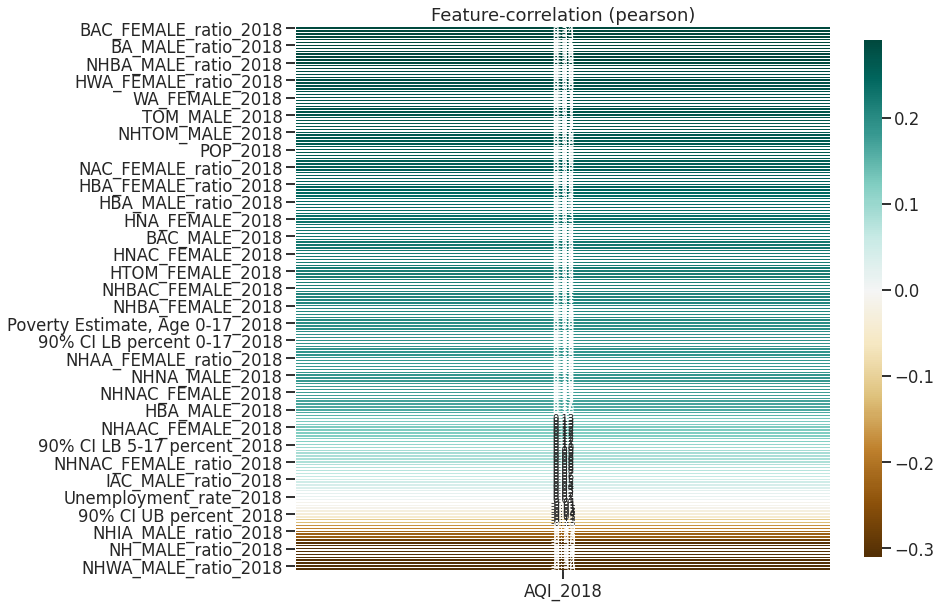

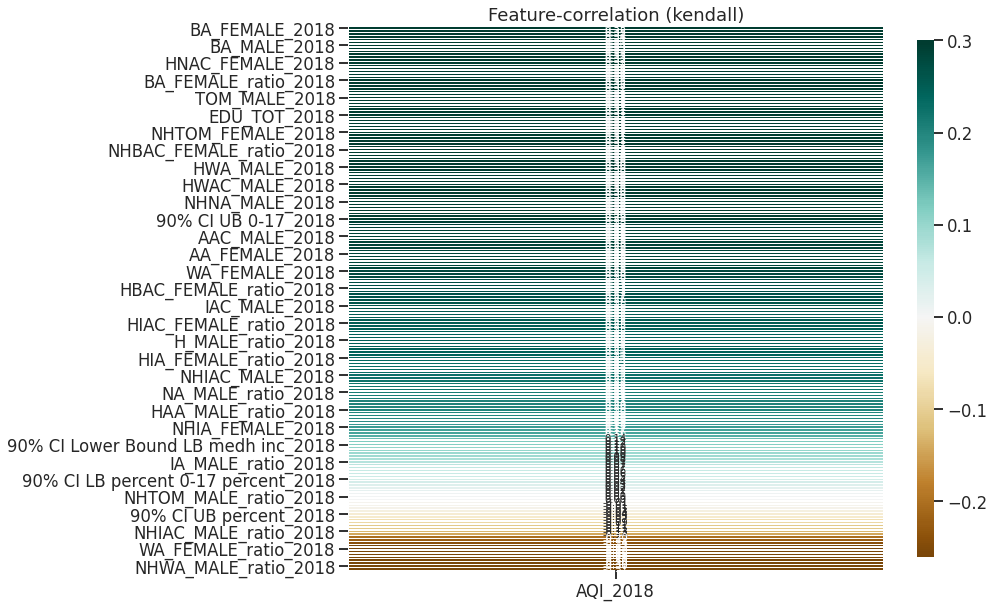

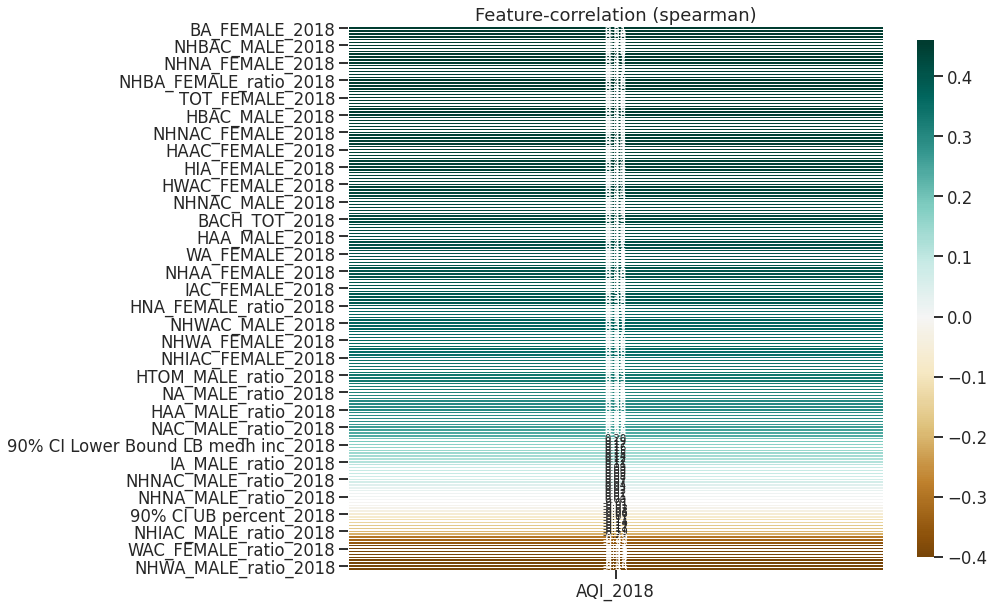

In [74]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Try make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [75]:
avg_NE_aqi_2019 = avg_NE_aqi_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(NE_unemploy_rate_2017_2019.columns[0:1]) + list(NE_unemploy_rate_2017_2019.columns[11:])
NE_unemploy_rate_2019 = NE_unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(NE_pov_ratio_2017_2019.columns[0:1]) + list(NE_pov_ratio_2017_2019.columns[45:])
NE_pov_ratio_2019 = NE_pov_ratio_2017_2019.loc[:, pov_col_2019]

NE_incomes_2019 = NE_incomes_2017_2019.iloc[:, [0, 4, 7]]

educ_vehicle_2019_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[34:])
NE_educ_vehicle_2019 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

dem_ratio_2019_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[293:])
NE_dem_ratio_2019 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2019_col]

In [76]:
NE_avg_aqi_unemploy_2019 = pd.merge(avg_NE_aqi_2019, NE_unemploy_rate_2019, how='inner')
NE_avg_aqi_unemploy_pov_2019 = pd.merge(NE_avg_aqi_unemploy_2019, NE_pov_ratio_2019, how='inner')
NE_avg_aqi_unemploy_pov_inc_2019 = pd.merge(NE_avg_aqi_unemploy_pov_2019, NE_incomes_2019, how='inner')
NE_avg_aqi_unemploy_pov_inc_educ_veh_2019 = pd.merge(NE_avg_aqi_unemploy_pov_inc_2019, NE_educ_vehicle_2019, how='inner')
df_2019 = pd.merge(NE_avg_aqi_unemploy_pov_inc_educ_veh_2019, NE_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,county Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,90% CI UB All Ages_2019,"Poverty Percent, All Ages_2019",90% CI LB percent_2019,90% CI UB percent_2019,"Poverty Estimate, Age 0-17_2019",90% CI LB percent 0-17_2019,90% CI UB 0-17_2019,"Poverty Percent, Age 0-17_2019",90% CI LB percent 0-17 percent_2019,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019,Personal income (thousands of dollars) 2019,Per capita personal income (dollars) 2019,POP_2019,EDU_TOT_2019,LESS_HS_TOT_2019,HS_TOT_2019,COL_OR_ASSOC_TOT_2019,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019,TOT_POP_2019,TOT_MALE_2019,TOT_FEMALE_2019,WA_MALE_2019,WA_FEMALE_2019,BA_MALE_2019,BA_FEMALE_2019,IA_MALE_2019,IA_FEMALE_2019,AA_MALE_2019,AA_FEMALE_2019,NA_MALE_2019,NA_FEMALE_2019,TOM_MALE_2019,TOM_FEMALE_2019,WAC_MALE_2019,WAC_FEMALE_2019,BAC_MALE_2019,BAC_FEMALE_2019,IAC_MALE_2019,IAC_FEMALE_2019,AAC_MALE_2019,AAC_FEMALE_2019,NAC_MALE_2019,NAC_FEMALE_2019,NH_MALE_2019,NH_FEMALE_2019,NHWA_MALE_2019,NHWA_FEMALE_2019,NHBA_MALE_2019,NHBA_FEMALE_2019,NHIA_MALE_2019,NHIA_FEMALE_2019,NHAA_MALE_2019,NHAA_FEMALE_2019,NHNA_MALE_2019,NHNA_FEMALE_2019,NHTOM_MALE_2019,NHTOM_FEMALE_2019,NHWAC_MALE_2019,NHWAC_FEMALE_2019,NHBAC_MALE_2019,NHBAC_FEMALE_2019,NHIAC_MALE_2019,NHIAC_FEMALE_2019,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield,46.495890,481023,463547,17476,3.6,83047.0,75296.0,90798.0,9.0,8.2,9.8,24441.0,21249.0,27633.0,11.8,10.3,13.3,18562.0,16078.0,21046.0,11.9,10.3,13.5,96966.0,93161.0,100771.0,114517864.0,121397.0,94333

* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

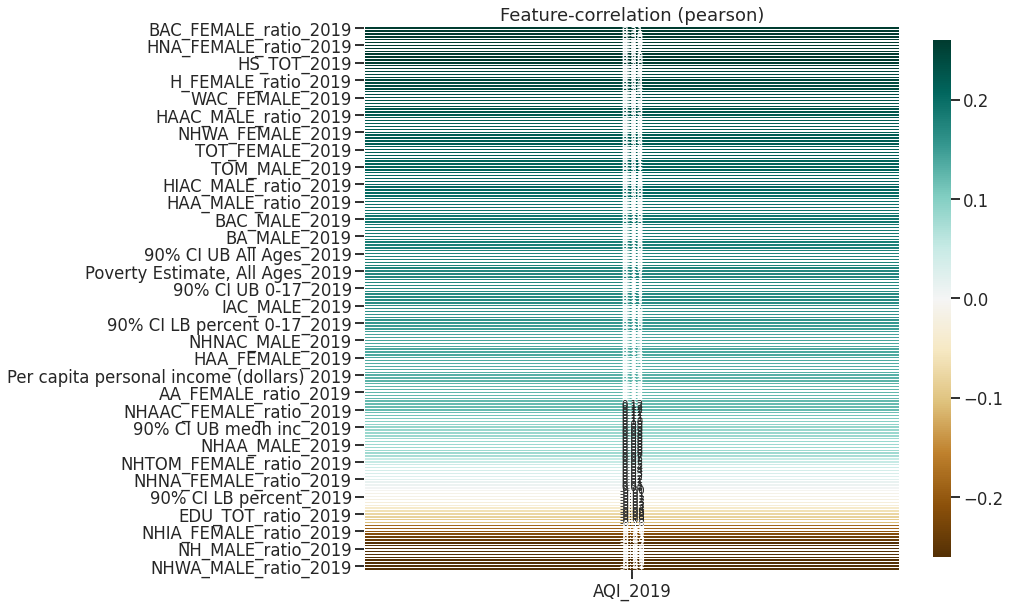

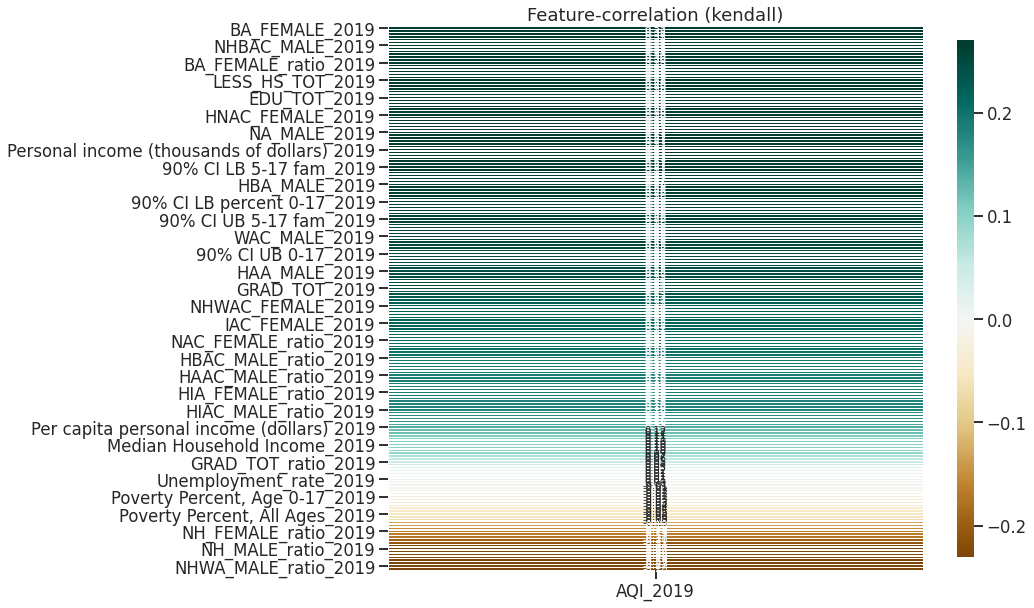

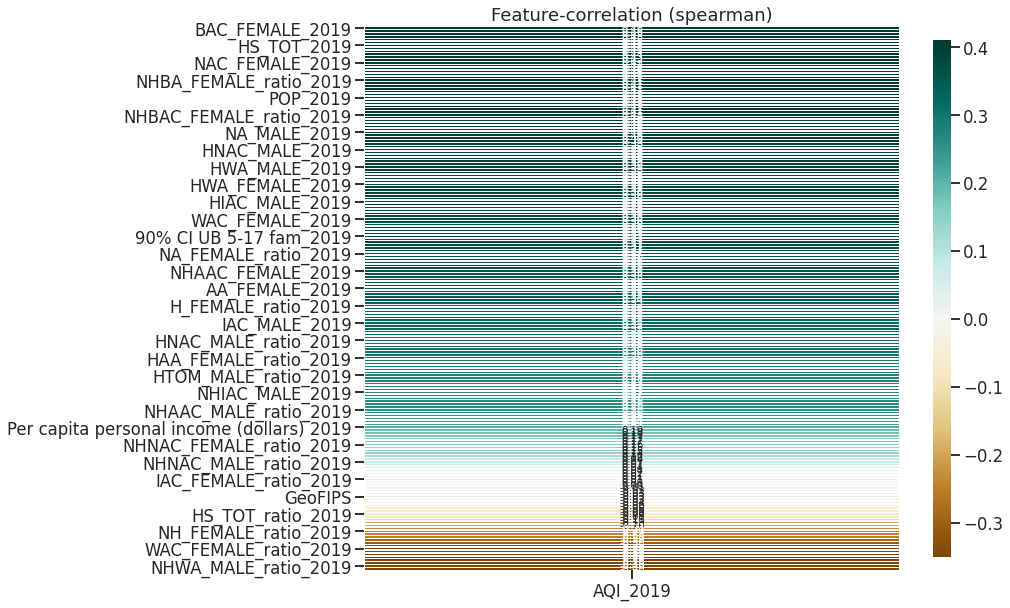

In [77]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [78]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,county Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,GRAD_TOT_2017,VEHICLE_TOT_2017,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield,46.315068,479458,457625,21833,4.6,82428.0,74608.0,90248.0

# save data


In [79]:
#save 2017-2019 dataset
data_path = r'../../data/processed/alt_full_dem_df_2017_2019'
df_2017_2019.to_csv(data_path, index=False)

#save datasets for individual years
data_path = r'../../data/processed/alt_full_dem_df_2017'
df_2017.to_csv(data_path, index=False)
data_path = r'../../data/processed/alt_full_dem_df_2018'
df_2018.to_csv(data_path, index=False)
data_path = r'../../data/processed/alt_full_dem_df_2019'
df_2019.to_csv(data_path, index=False)

In [80]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

HNAC_FEMALE_ratio_2017     0.190756
HNA_FEMALE_ratio_2017      0.191780
Unemployed_2017            0.196824
TOT_FEMALE_ratio_2017      0.202237
VEHICLE_TOT_2017           0.209205
HS_TOT_2017                0.211536
NHBA_MALE_ratio_2017       0.262107
BA_MALE_ratio_2017         0.264864
NHBAC_MALE_ratio_2017      0.265391
BAC_MALE_ratio_2017        0.269597
NHBA_FEMALE_ratio_2017     0.279015
BA_FEMALE_ratio_2017       0.280889
NHBAC_FEMALE_ratio_2017    0.282360
BAC_FEMALE_ratio_2017      0.285069
AQI_2017                   1.000000
Name: AQI_2017, dtype: float64

COL_OR_ASSOC_TOT_2018      0.288882
NHBA_MALE_ratio_2018       0.291288
NHBAC_MALE_ratio_2018      0.292866
HNAC_FEMALE_ratio_2018     0.295672
Unemployed_2018            0.298367
HNA_FEMALE_ratio_2018      0.299640
TOT_FEMALE_ratio_2018      0.303310
BA_MALE_ratio_2018         0.306014
BAC_MALE_ratio_2018        0.311454
NHBA_FEMALE_ratio_2018     0.325695
NHBAC_FEMALE_ratio_2018    0.327626
VEHICLE_TOT_2018           0.331917
BA_FEMALE_ratio_2018       0.337740
BAC_FEMALE_ratio_2018      0.342563
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

Unemployed_2019            0.255524
HS_TOT_2019                0.257668
NHBA_MALE_ratio_2019       0.258102
NHBAC_MALE_ratio_2019      0.259097
HNAC_FEMALE_ratio_2019     0.259517
BA_MALE_ratio_2019         0.269263
BAC_MALE_ratio_2019        0.273125
HNA_FEMALE_ratio_2019      0.275369
TOT_FEMALE_ratio_2019      0.292989
NHBA_FEMALE_ratio_2019     0.299474
NHBAC_FEMALE_ratio_2019    0.300548
VEHICLE_TOT_2019           0.306044
BA_FEMALE_ratio_2019       0.306999
BAC_FEMALE_ratio_2019      0.310091
AQI_2019                   1.000000
Name: AQI_2019, dtype: float64

In [81]:
# see scatter plots
# df_columns = df_2019.columns[4:]
# for col in df_columns:
#     fig, ax = plt.subplots(figsize=(10,10))
#
#     plt.title(' 2019: mean AQI vs ' + col)
#     plt.xlabel(col)
#     plt.ylabel('Mean AQI')
#     ax.scatter(df_2019[col], df_2019['AQI_2019'], label=col)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()


In [82]:
# df_2019.sort_values(['AQI_2019'], ascending=False)
# df_2019.sort_values(['HNAC_FEMALE_ratio_2019'], ascending=False)

In [83]:
# df_2019['AQI_2019'].hist()
# df_2019['AQI_2019'].describe()

# ~~possible working with only ozone aqi data in future notebooks~~
# ~~also possible to work with more counties~~

* After working with ozone pollution in data_wrangling12, it was decided that data_wrangling11 dataset best be used
* Data_Wrangling11 which contains all pollutants will be used because we have more countie data than ozone dataset in data_wrangling12